## Task-1 Data analysis project using python
Student Performance Data Analysis
This notebook performs exploratory data analysis (EDA) on the Student Performance dataset
(`student-mat.csv`) following the instructions provided in Task 1.


In [2]:
# Loading Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# a. Loading the Dataset
df = pd.read_csv("student-mat.csv", sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
# b. Basic Data Exploration
print("Missing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nDataset Shape:", df.shape)

Missing Values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher  

## Data Overview
- No missing values were found.
- There are `395` rows and `33` columns.
- All features are already in proper format.


In [13]:
# c. Data Cleaning
#no missing values were found hence no need to replace or remove any
# Removing duplicates
df_cleaned = df.drop_duplicates()
print("Shape after removing duplicates:", df_cleaned.shape)

Shape after removing duplicates: (395, 33)


In [15]:
# d. Data Analysis Questions
# 1. Average Score in Math (G3)
avg_g3 = df_cleaned["G3"].mean()
print(f"Average Final Grade (G3): {avg_g3:.2f}")


Average Final Grade (G3): 10.42


In [17]:
# 2.Students scoring above 15
above_15 = df_cleaned[df_cleaned["G3"] > 15].shape[0]
print(f"Number of Students Scoring Above 15: {above_15}")

Number of Students Scoring Above 15: 40


In [19]:
# 3. Correlation between study time and G3
correlation = df_cleaned["studytime"].corr(df_cleaned["G3"])
print(f"Correlation between Study Time and G3: {correlation:.2f}")


Correlation between Study Time and G3: 0.10


In [23]:
# 4. Average G3 by Gender
avg_by_gender = df_cleaned.groupby("sex")["G3"].mean()

# Determine the gender with higher average
higher_gender = avg_by_gender.idxmax()
higher_avg = avg_by_gender.max()

print(f"Gender with higher average final grade (G3): {higher_gender} ({higher_avg:.2f})")


Gender with higher average final grade (G3): M (10.91)


## Analysis Findings:

1. Average Final Grade (G3): 10.42
2. Students with G3 > 15
3. Correlation between Study Time and G3: Positive correlation 0.10.
4. Gender Comparison: Comparison of average final scores by gender- highest average is for male 10.91.


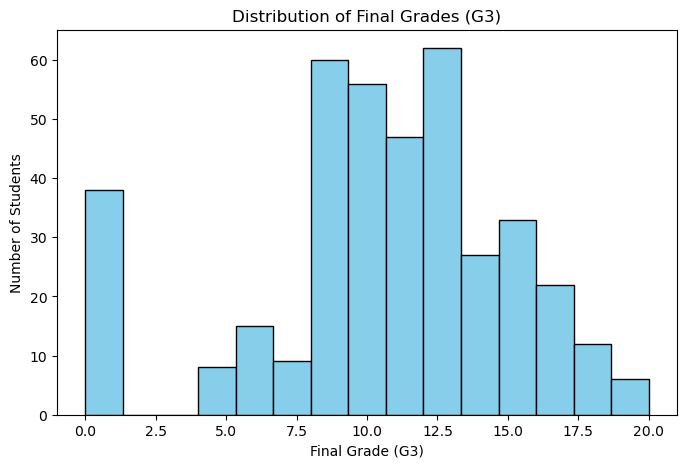

In [25]:
# e. Data Visualization
# 1. Histogram of Final Grades
plt.figure(figsize=(8, 5))
plt.hist(df_cleaned["G3"], bins=15, color='skyblue', edgecolor='black')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.show()

## Insights
Most students score between 10 and 15. A few scored above 18, indicating top performers.
Many students scored below 5 marks too.

/var/folders/vf/ntv0ct393rg_ztmmmrw7y8780000gn/T/ipykernel_53418/1484957745.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="studytime", y="G3", data=df_cleaned, palette="Set2")


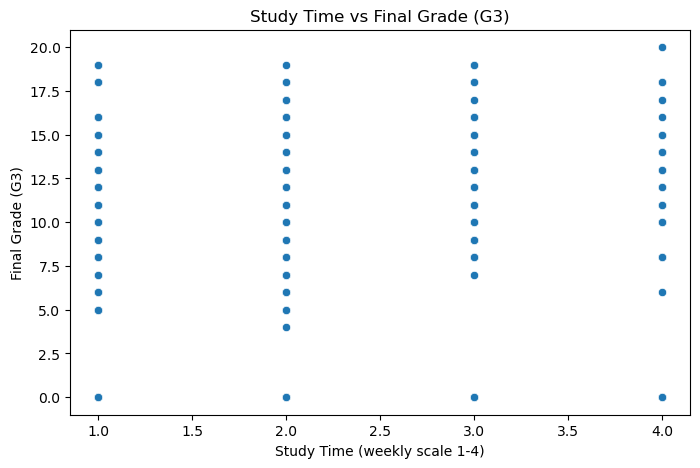

In [29]:
# 2. Scatter Plot (Study Time vs G3)
plt.figure(figsize=(8, 5))
sns.scatterplot(x="studytime", y="G3", data=df_cleaned, palette="Set2")
plt.title("Study Time vs Final Grade (G3)")
plt.xlabel("Study Time (weekly scale 1-4)")
plt.ylabel("Final Grade (G3)")
plt.show()


## Insights
There's a weak but noticeable trend — students who study more tend to perform better.

/var/folders/vf/ntv0ct393rg_ztmmmrw7y8780000gn/T/ipykernel_53418/1334138016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_by_gender.index, y=avg_by_gender.values, palette="pastel")


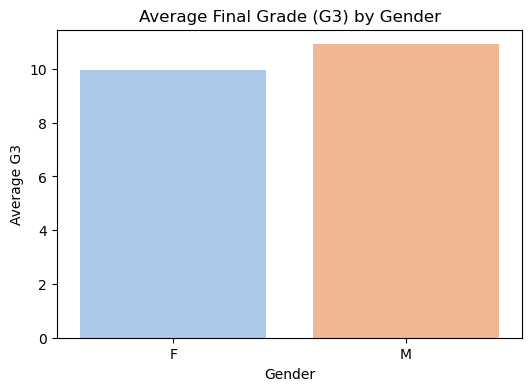

In [31]:
# 3. Bar Chart (Average G3 by Gender)
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_by_gender.index, y=avg_by_gender.values, palette="pastel")
plt.title("Average Final Grade (G3) by Gender")
plt.xlabel("Gender")
plt.ylabel("Average G3")
plt.show()

## Insights
Male students (M) have a slightly higher average G3 than female students (F).